<a href="https://colab.research.google.com/github/josephboban2000/AIML/blob/main/Copy_of_ann_self_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal
Suspect
Pathological


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading Dataset
data = pd.read_csv("fetal_health.csv")

In [ ]:
data.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Checking all values are numeric, and no values are categorical, so no need for Dummycoding

In [ ]:
data.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0




# There is no null values so we can proceed with this



In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


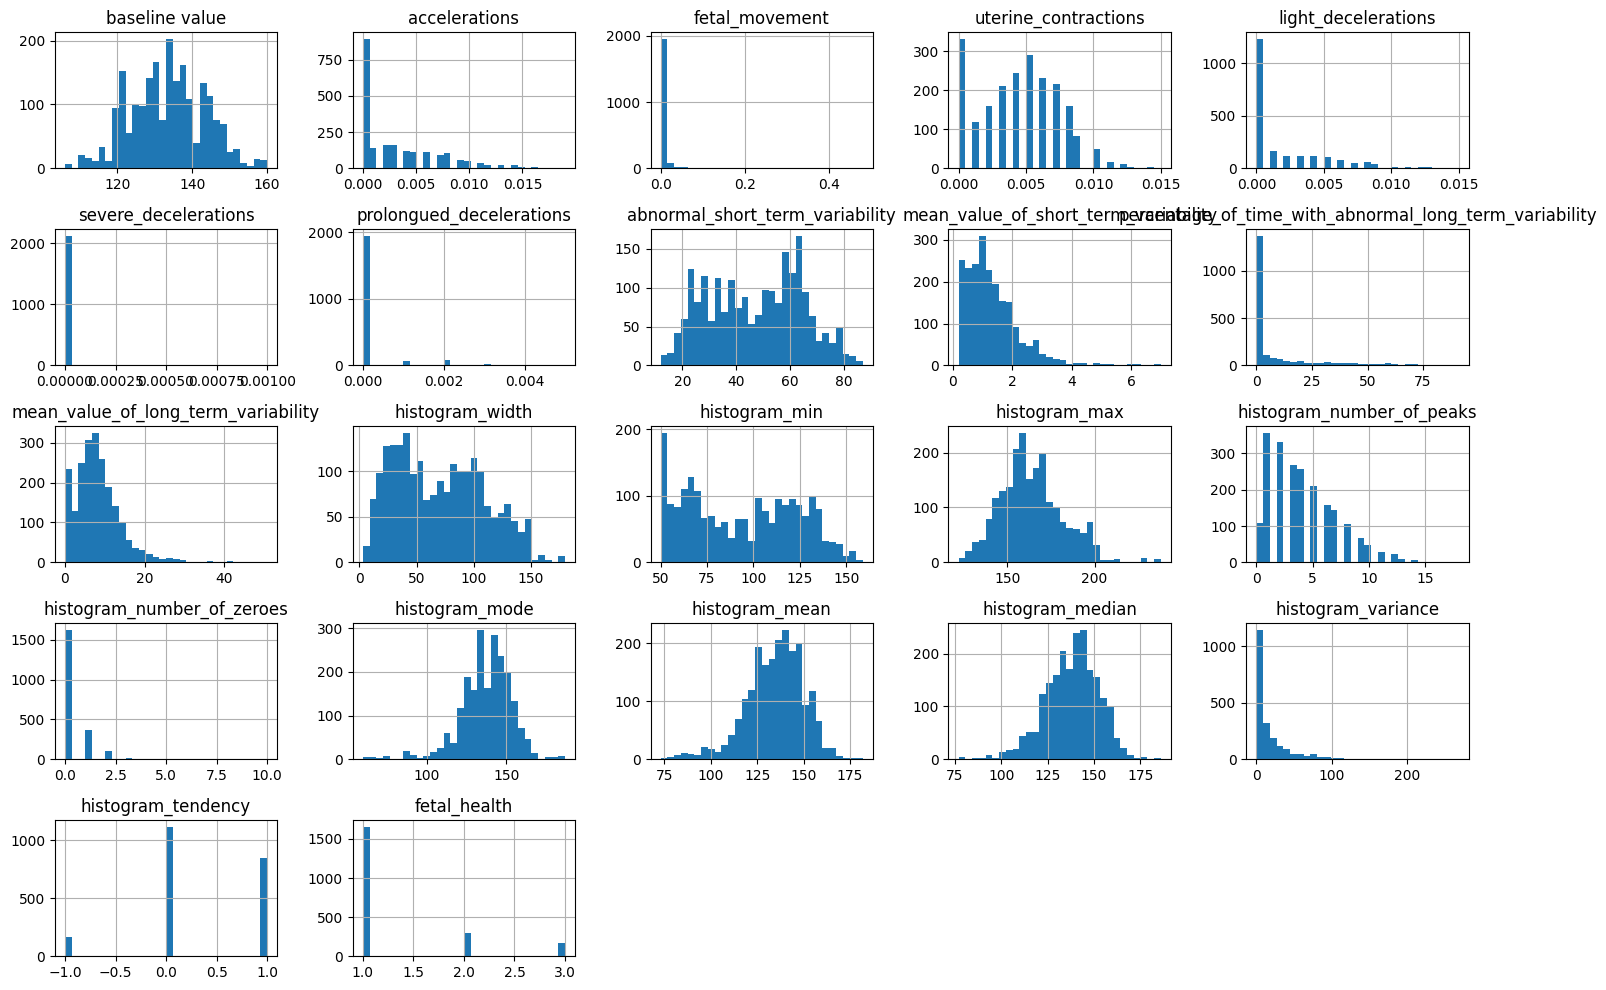

In [ ]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

here we can see the distribution of various ivs' and dvs' distribution , the styles are generally in the form of either e^-x, normal ditribuion,right tailed distribution, the histogramic measures are somewhat normal or the penultimate row and almost bimodal for the other row, the output has class 1 values the most, the decelerations are mainly folloing negative exponential graph, the variabiity graphs shows either bi-modal or right skewed distribution.

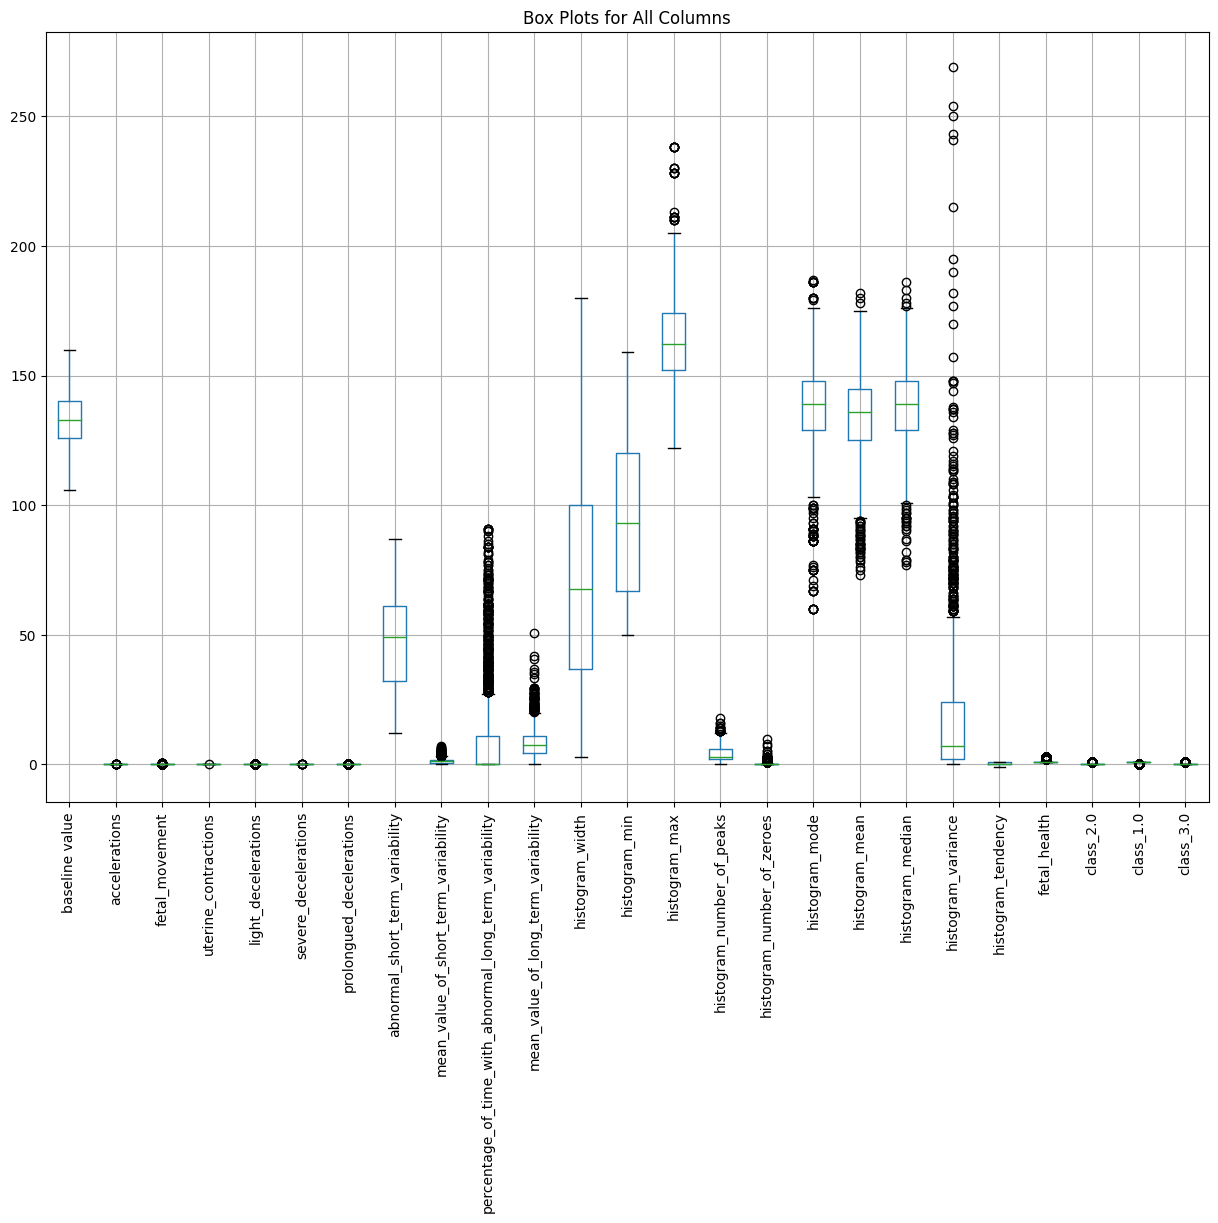

In [ ]:
data.boxplot(figsize=(15, 10), rot=90)
plt.title('Box Plots for All Columns')
plt.show()

# There is no outliers or we are forced to do so  as they are medical data, these are possible values which we expect from CTG scans, some factors are so common for the general population and it might be very high for a short population who have the medical condition, so it is a hard choise, better took a support of a medical practitioner to decide whether we should drop this value or smooth the outliers and outliers are also common in medical data and we cant smooth the outliers as it might give some hidden insights later.

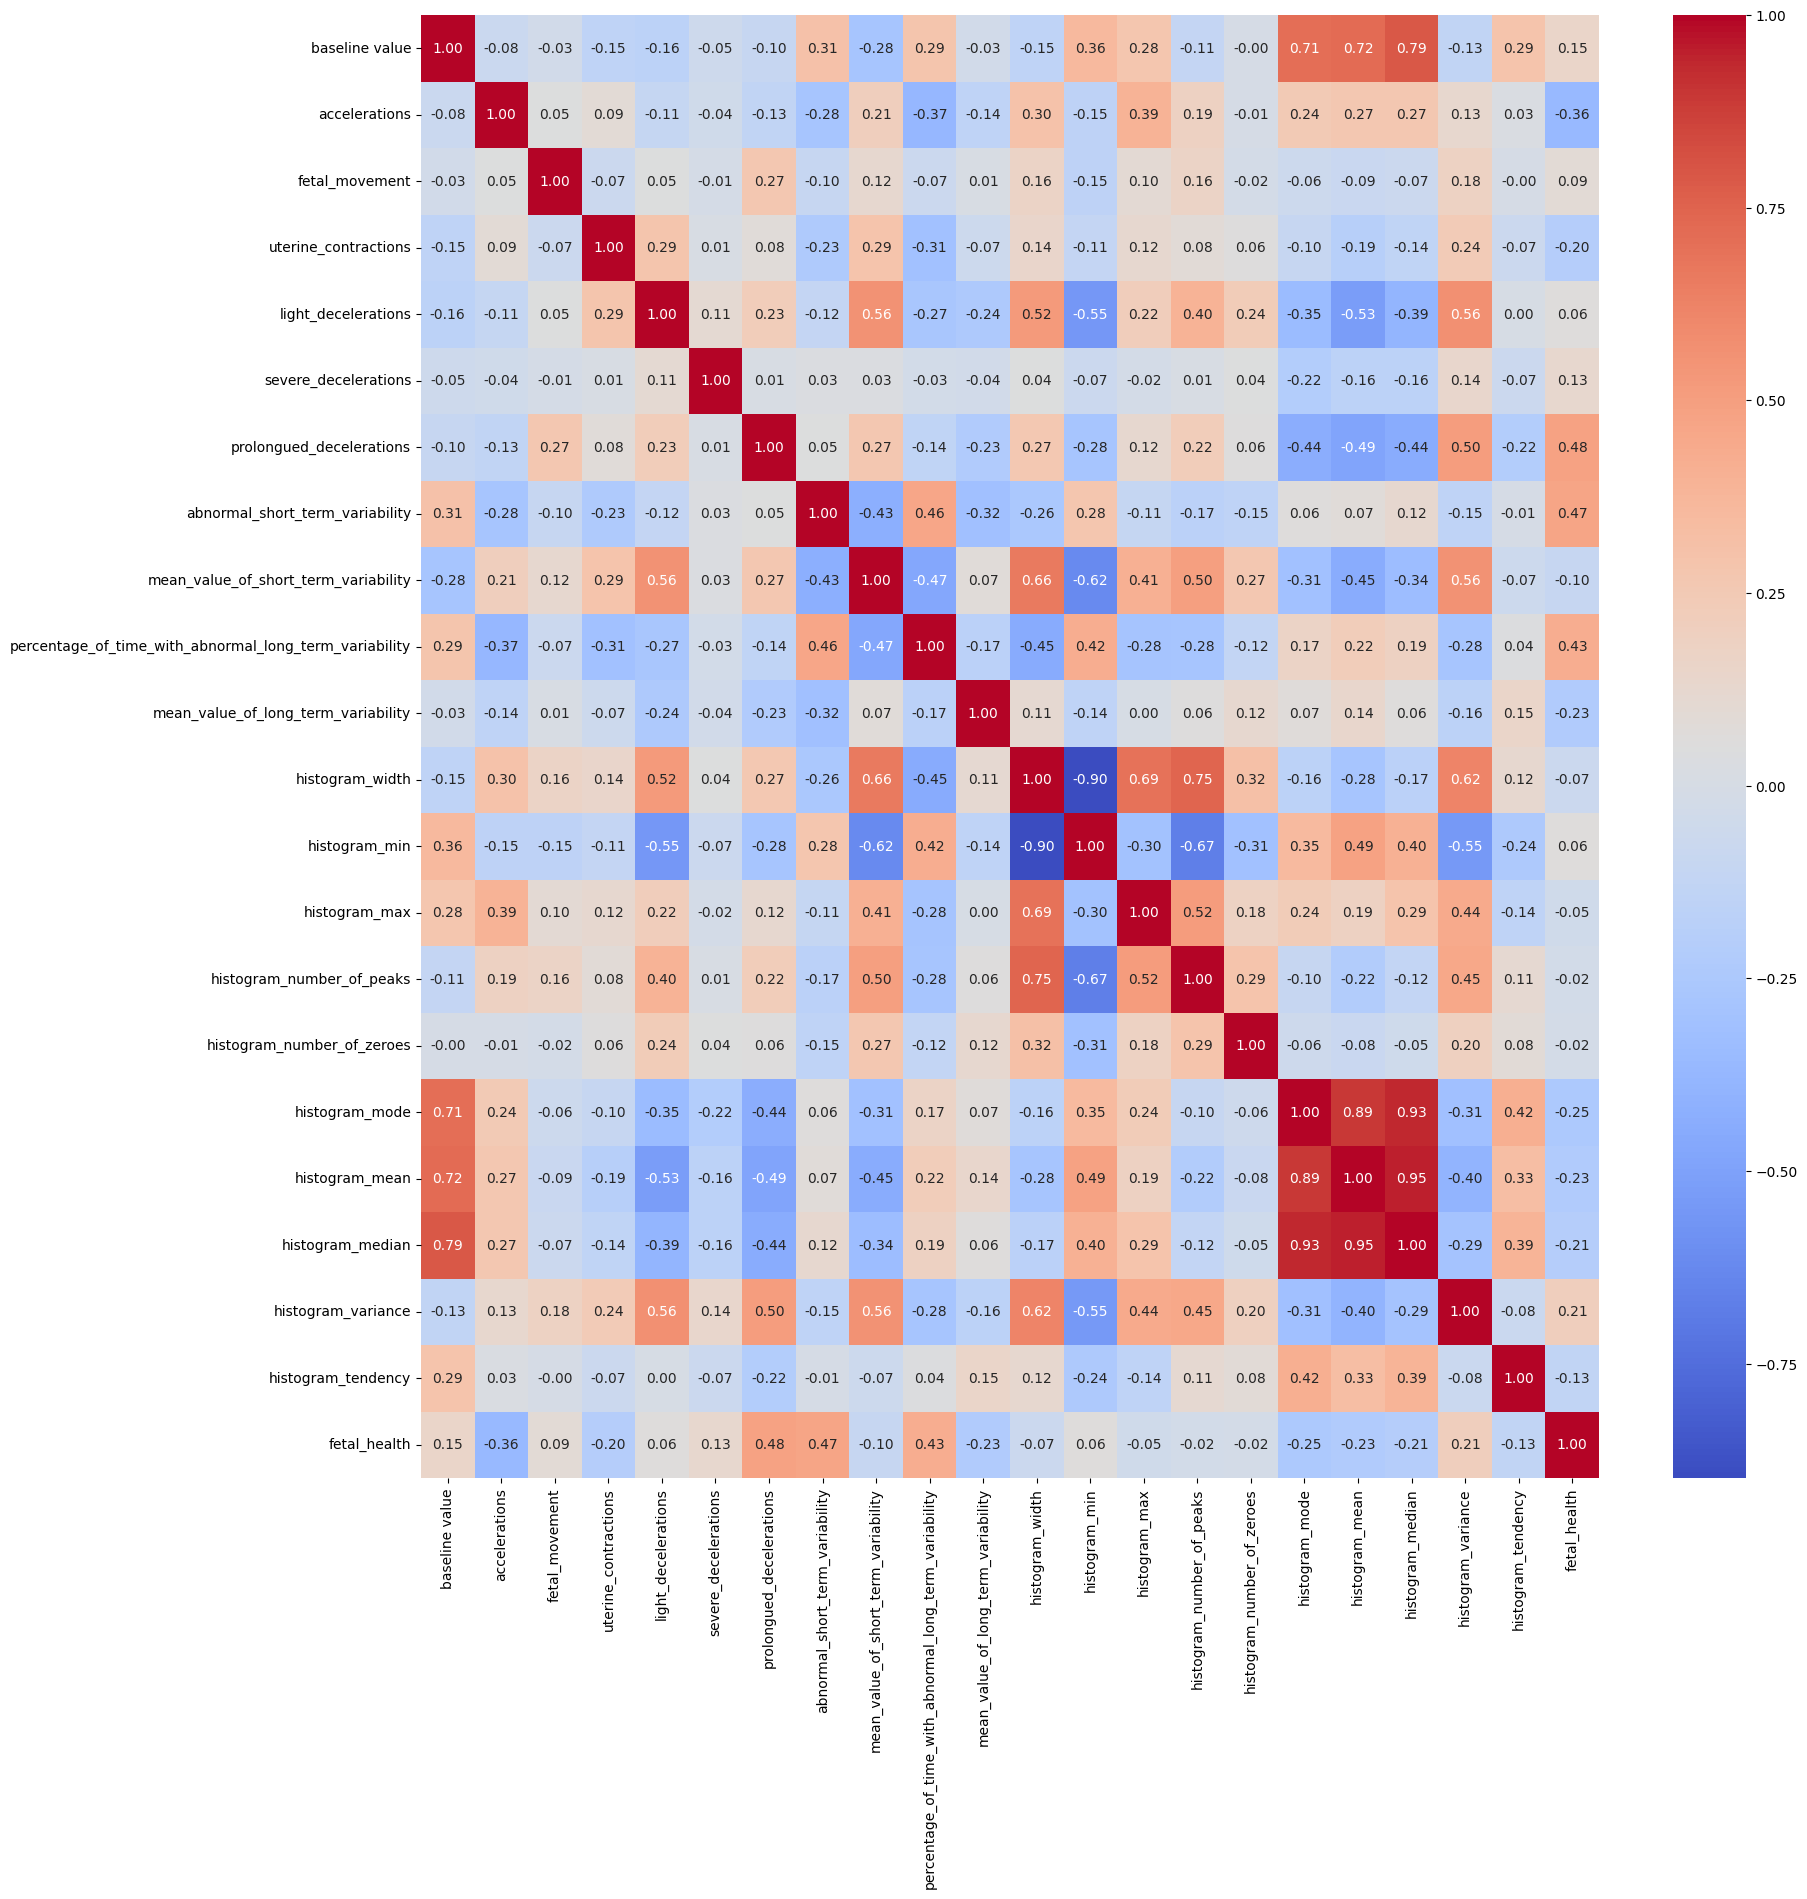

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cormat = data.corr()
annot = True

plt.figure(figsize=(19, 19))  # Increase figure size for a larger heatmap
hm = sns.heatmap(data=cormat, annot=annot, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.show()

#we can see high correlation between the 3 histogram variables , droping is very risky as is medical data and droping any of these parameters will turn the model blind towards something which might be really important in some cases, generally they are correlated among themselves, and the correlation between other variables by them is relatively low, so as it is a medical data, i am keeping this variable and i am fully aware that ANN can handle this situation which a traditional machine learning model cannot do.

#Histogram varience is an important parameter and i cant drop it as it is statistically ralated to similar parameters and if i drop it , it will affect the reliability of the model.

#I am keeping the prolonged decelerations, abnormal short variability, and percentage of time with abnorminal long term variability as it is highly correlated with the outcome.

In [ ]:
df=data

In [ ]:
import seaborn as sns

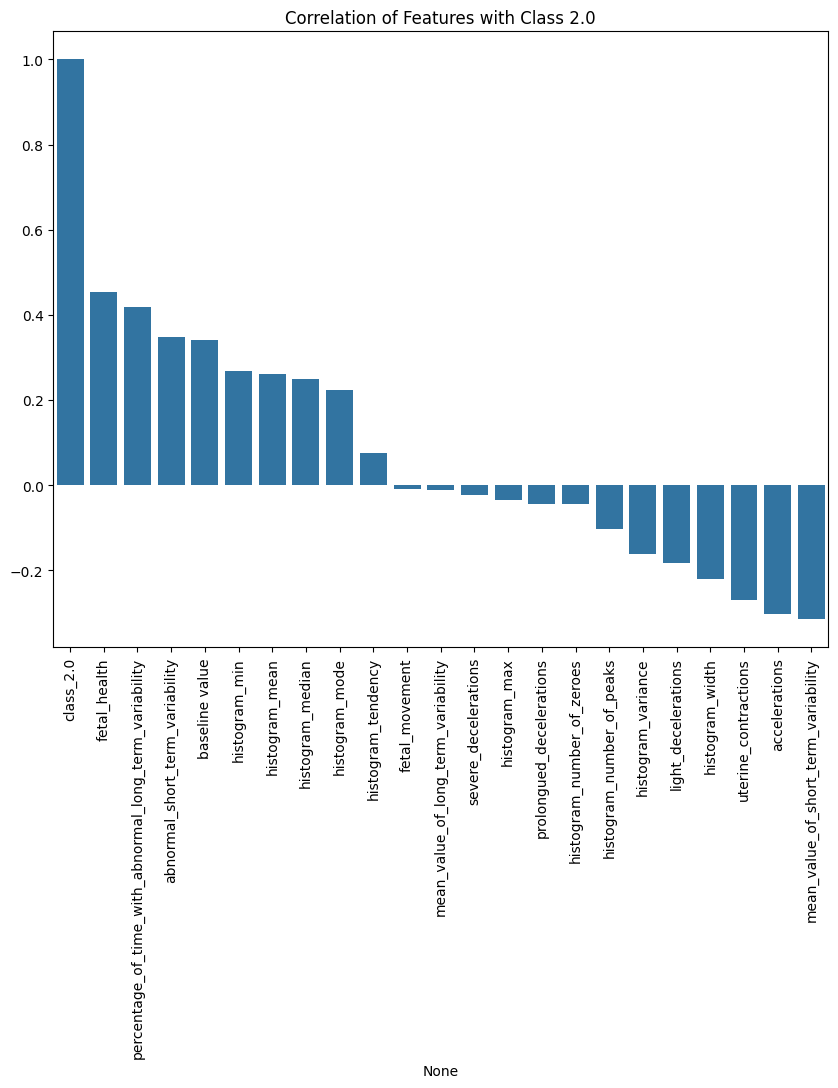

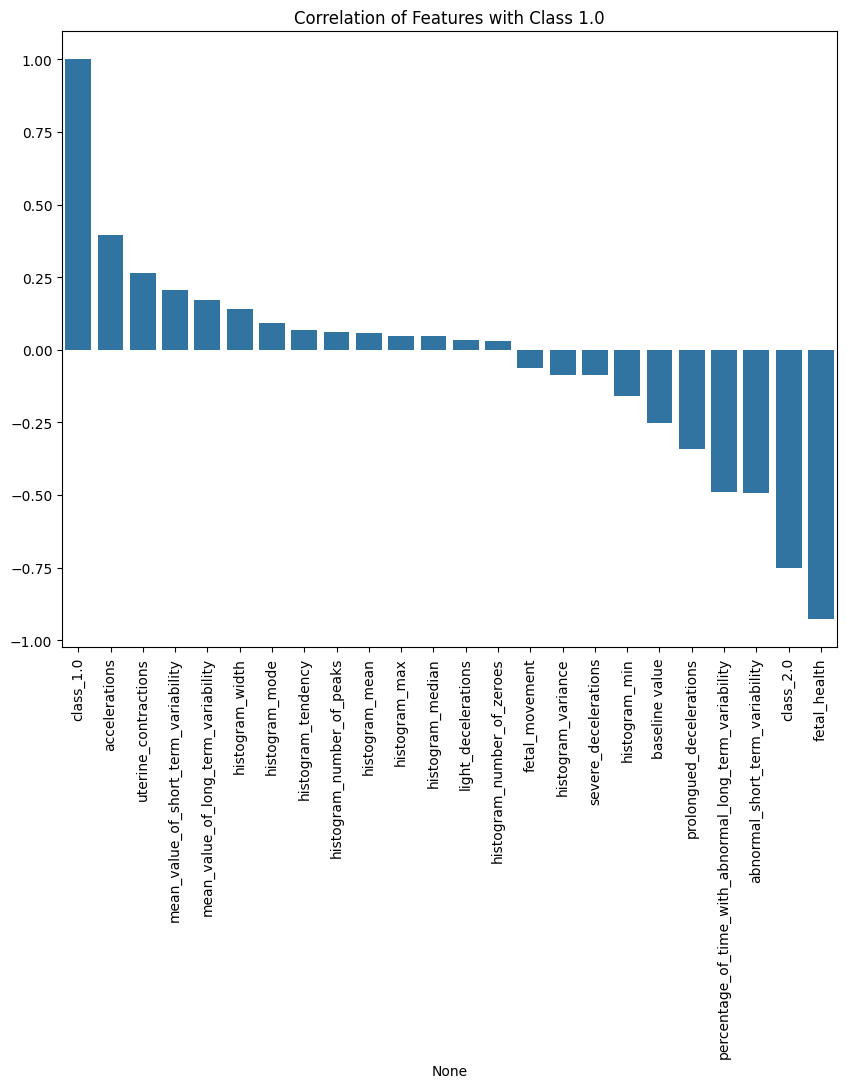

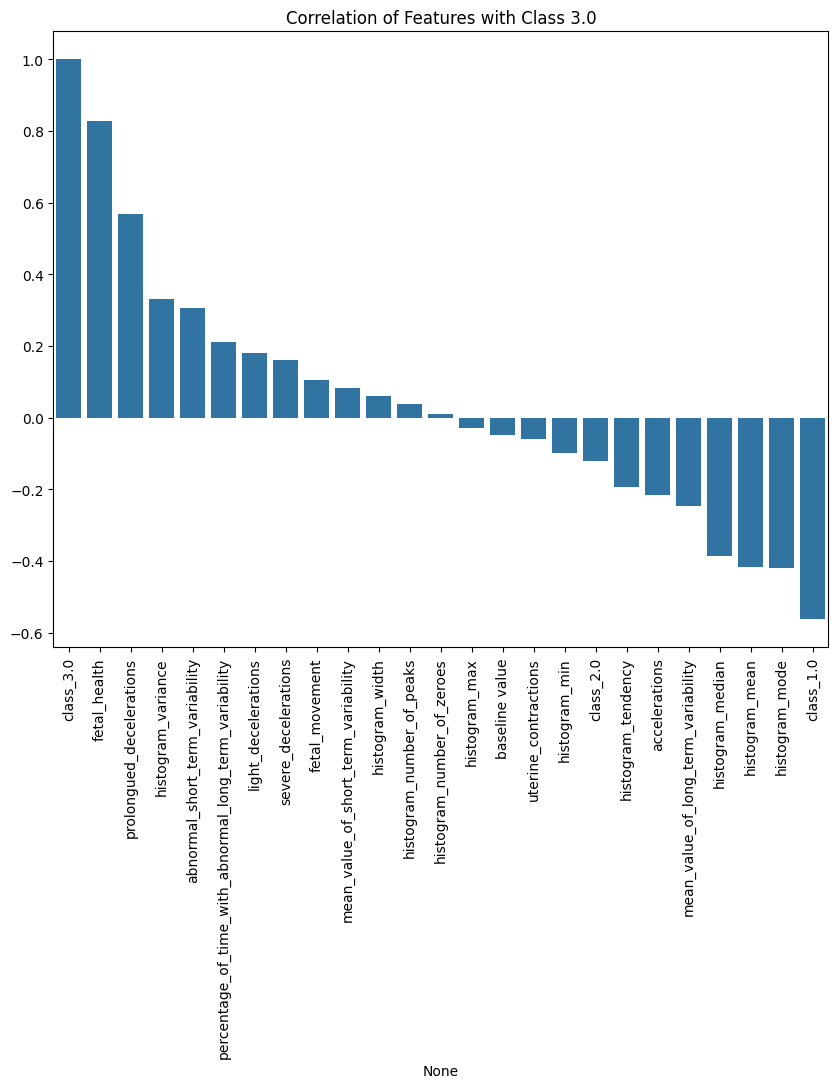

In [ ]:
for class_label in df['fetal_health'].unique():
    df[f'class_{class_label}'] = (df['fetal_health'] == class_label).astype(int)

    # Calculate correlation
    correlation_matrix = df.corr()[f'class_{class_label}'].sort_values(ascending=False)

    # Visualize the correlation
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation of Features with Class {class_label}')
    plt.xticks(rotation=90)
    plt.show()

these are the correlation for each class between the DVs, abnorminal long term variability and short term variability is affecting positively and histogram peaks, varience , width, light decelerations,uterine contractions and accelerations are affecting negatively for Class 2

long term variability and short term variability is affecting negatively and histogram peaks, varience , width, light decelerations,uterine contractions and accelerations are affecting slightly positively  for Class 1

for class 3, prolonged decelerations, histogram varience, abnormal short term and long term variability are influencing more positively than class 1 , and histogram mean, mode and median, acceleration ,and mean value of long term variability is affecting slightly lesser than class 1.

In [ ]:
print(data.columns.tolist())

['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']


In [ ]:
data2=data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']]

In [ ]:
X = data2[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]

In [ ]:
y = data2['fetal_health']-1

#the output is in a class of 1,2,3. for classifcation i am using sparse categorical cross entropy as my loss function. as it expect a value range starting from 0, so  i am reducing the outputs by one.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# i am using a 3 hidden layer neural network with more neurones per hidden layer as it is a medical data and is very sensitive. in my previous tries te model was giving me either poor or overfitted results.
#to identify the overfitting i created some duplication of the testing data and i gave the training data instead of test data to test the model's internal performance, by doing so , i found that the internal versions are giving me high outputs and testing is pathetic. this is how i found overfitting the data. to reduce it i increased the neurones and added dropouts as when dropout increases in a small neural network, it will become even more pathetic, i didnt use excecution breaking when the model reach a specified accuracy as it was showing the batch accuracy seperately.
 in optimiszer adam gave me the good result

 to avoid gradient descent, i used relu inside the hidden layer and softmax as it is a 3 class classification problem in the last layer,  

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

ann = Sequential()
#Adding First Hidden Layer
ann.add(Dense(units=128,activation="relu"))
ann.add(Dropout(.2))
 #Adding Second Hidden Layer
ann.add(Dense(units=64,activation="relu"))
ann.add(Dropout(.2))
ann.add(Dense(units=32,activation="relu"))
ann.add(Dropout(.1))
 #Adding Third Hidden  Layer
#ann.add(Dense(units=8,activation="relu"))
 #Adding Output Layer
ann.add(Dense(units=3,activation="softmax"))
# Build the model
ann.build(input_shape=(None, 21))  # Replace input_dim with the number of features in your input data


In [ ]:
# Compile the model and calculate its accuracy:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print a summary of the Keras model:

In [ ]:
ann.fit(xtrain,ytrain,batch_size=32,epochs = 600)

Epoch 1/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0145
Epoch 2/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9887 - loss: 0.0331
Epoch 3/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0132
Epoch 4/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0160
Epoch 5/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0169
Epoch 6/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0179
Epoch 7/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0205
Epoch 8/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0237
Epoch 9/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0162
Epoch 10/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0177
Epoch 11/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0282
Epoch 12/600
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
ypred = ann.predict(xtest)

# Convert probabilities to class predictions (0, 1, 2) using argmax
ypred = np.argmax(ypred, axis=1)

# Print the predicted classes
print(ypred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 2 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 1 1 0 0 2 1 0
 0 0 0 0 0 1 1 0 0 2 1 0 0 0 0 0 0 0 2 0 0 0 1 2 0 1 0 0 0 0 1 0 1 0 1 2 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 2 0 1 1 0 0 0 0 0 0 2 0 0 2 0 0 2 1 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 2 0 0 1 0 0 0 0 2 0 0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0
 0 1 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 1 2 1 1 0 1 0 2 0 0
 2 0 2 2 0 0 1 2 0 2 0 1 0 2 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 0
 0 0 2 2 0 2 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(ytest, ypred)
print(cm)
accuracy_score(ytest,ypred)

[[318   7   1]
 [  9  47   2]
 [  2   3  37]]


0.9436619718309859

In [ ]:
cr=metrics.classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       326
         1.0       0.82      0.81      0.82        58
         2.0       0.93      0.88      0.90        42

    accuracy                           0.94       426
   macro avg       0.91      0.89      0.90       426
weighted avg       0.94      0.94      0.94       426



Here, 0 represents class 1 , 1 represents class 2 and 2 represents class 3.

The model's performance metrics indicate strong overall accuracy at 94%, with a detailed breakdown across the three classes. Class 1 (represented by 0) achieved the highest precision and recall, both around 97-98%, indicating a robust ability to correctly identify instances of this class. Class 2 (represented by 1) showed lower performance, with precision and recall around 82%, suggesting some challenges in distinguishing it from other classes. Class 3 (represented by 2) had a precision of 93% and a recall of 88%, reflecting a relatively balanced but slightly lower performance compared to Class 1. The weighted averages for precision, recall, and accuracy all align closely with the overall accuracy, reinforcing the model's consistent performance across different classes.